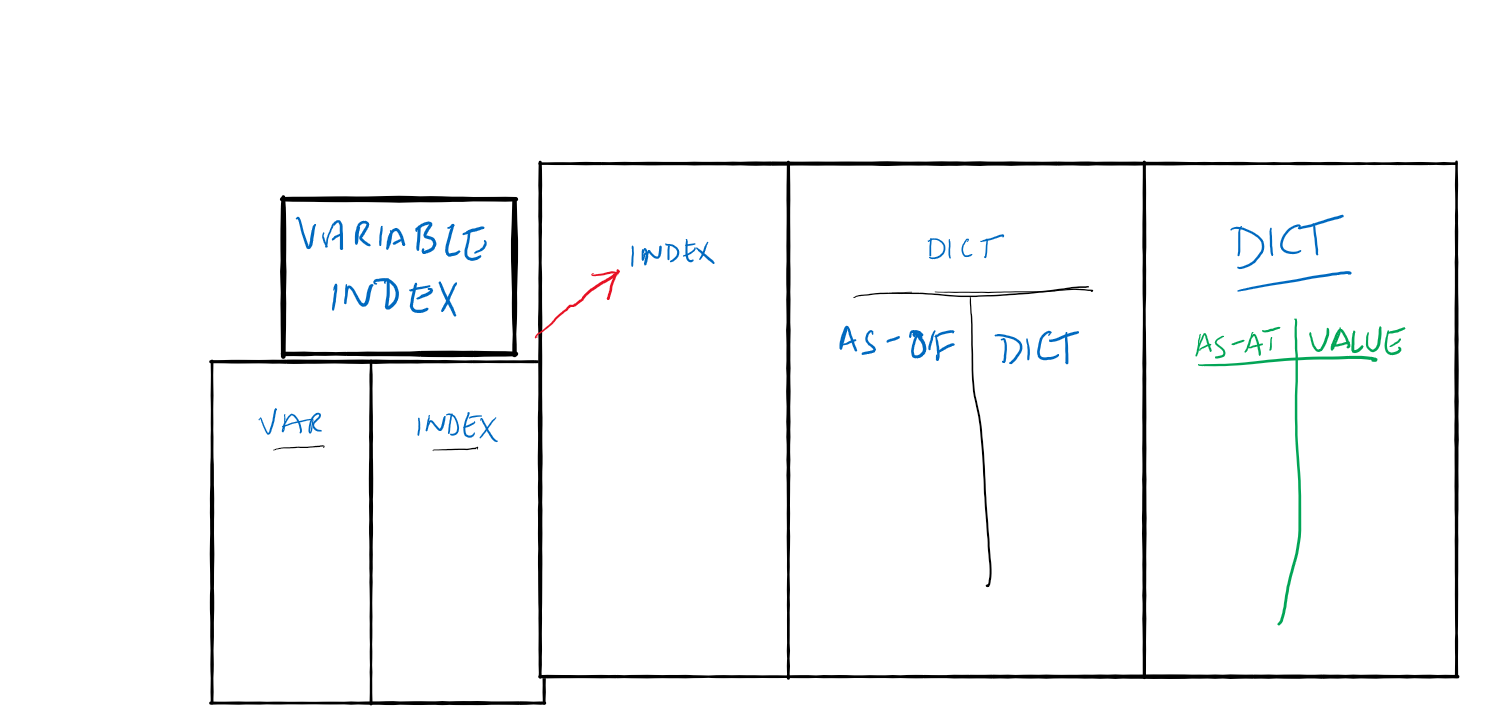

In [290]:
from datetime import *
import random
import pprint

In [291]:
# Main variable data table has all the as-of and as-at dictionaries
variable_data = {}

# The variable to index mapping
variable_index = {}



In [292]:
# Load Hashtables with random prices

def load_data(stock_name, min_price, max_price):
    market_hours = [9, 10, 11, 12, 1, 2, 3, 4]
    for z in range(0, 5000):
        num_as_at = random.randint(2, 10)
        hour = random.sample(market_hours, 1)
        minute = random.randint(0, 59)
        second = random.randint(0, 59)
        as_of = datetime(2020, 7, 25, hour[0], minute, second)
        for x in range(1, num_as_at):
                price = round(random.uniform(min_price, max_price),2)
                set_variable_value_as_of_as_at(stock_name, as_of, price)

# Find the nearest timeslot to the one provided
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [293]:
#The 'Data load API' - Params: Variable Name, Time slot and Updated value
def set_variable_value_as_of_as_at(variable_name, as_of, value):
    if variable_name not in variable_index:
        size = len(variable_index)
        variable_index[variable_name] = size
    index = variable_index[variable_name]
    
    if index not in variable_data:
        as_of_dict = {}
        variable_data[index] = as_of_dict    
    as_of_dict = variable_data[index]
    
    if as_of not in as_of_dict:
        as_at_dict = {}
        as_of_dict[as_of] = as_at_dict
    as_at_dict = as_of_dict[as_of]
    
    size = len(as_at_dict)
    as_at_dict[size] = value
    
# The 'Query API' - Params: Variable name, Time Slot and Update (0 = all, -1 = last update, or specify number)
def get_variable_value_as_of_as_at(variable_name, as_of, as_at):  
    index = variable_index[variable_name]
    slots = []
    for k, v in variable_data[index].items():
        slots.append(k)
    slot = nearest(slots, as_of)
    if (as_at > 0):
        return slot, variable_data[index][slot][as_at]
    if (as_at == 0):
        return slot, variable_data[index][slot]
    if (as_at == -1):
        last_update = len(variable_data[index][slot])    
        return slot, variable_data[index][slot][last_update - 1]


# Load dummy data for MSFT
load_data('MSFT', 190, 205)

# Load dummy data for GOOG
load_data('GOOG', 1450, 1550)


In [294]:
# Call the API
s, v = get_variable_value_as_of_as_at('GOOG', datetime(2020, 7, 25, 10, 45, 1), 0)
print('GOOG at', s, '=', v)
s, v = get_variable_value_as_of_as_at('MSFT', datetime(2020, 7, 25, 10, 45, 1), 0)
print('MSFT at', s, '=', v)
s, v = get_variable_value_as_of_as_at('GOOG', datetime(2020, 7, 25, 14, 30, 33), -1)
print('Last update for GOOG at', s, '=', v)
s, v = get_variable_value_as_of_as_at('MSFT', datetime(2020, 7, 25, 12, 15, 21), -1)
print('Last update MSFT at', s, '=', v)

GOOG at 2020-07-25 10:45:00 = {0: 1455.75, 1: 1482.88, 2: 1537.04, 3: 1474.36, 4: 1510.81, 5: 1502.04, 6: 1493.66, 7: 1496.81}
MSFT at 2020-07-25 10:45:02 = {0: 190.38}
Last update for GOOG at 2020-07-25 12:59:50 = 1502.85
Last update MSFT at 2020-07-25 12:15:22 = 203.32
